Data Preprocessing

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random
from sklearn.impute import SimpleImputer

# Load the dataset
googleplaystore = pd.read_csv('/content/googleplaystore.csv')

# Display the first few rows of the dataset
print("Google Play Store Dataset:")
print(googleplaystore.head())

# Data Preprocessing
## Handle missing values
# Use SimpleImputer for better handling of missing values
imputer = SimpleImputer(strategy='median')
numerical_features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

# Convert 'Size' column to numeric, handling non-numeric values
def convert_size_to_numeric(size):
    if isinstance(size, str):
        if size.endswith('k'):
            return float(size[:-1]) * 1e3  # Convert kilobytes to bytes
        elif size.endswith('M'):
            return float(size[:-1]) * 1e6  # Convert megabytes to bytes
        elif size == 'Varies with device':
            return np.nan  # Replace 'Varies with device' with NaN
    try:
        return float(size)  # Try converting to float if possible
    except (ValueError, TypeError):
        return np.nan  # Handle other non-numeric cases

googleplaystore['Size'] = googleplaystore['Size'].apply(convert_size_to_numeric)

googleplaystore[numerical_features] = googleplaystore[numerical_features].apply(pd.to_numeric, errors='coerce')
googleplaystore[numerical_features] = imputer.fit_transform(googleplaystore[numerical_features])

# Fill missing values for categorical columns if needed
googleplaystore['Genres'] = googleplaystore['Genres'].fillna('Unknown')

## Remove duplicates
googleplaystore = googleplaystore.drop_duplicates()

## Normalize numerical features using Z-score normalization
scaler = StandardScaler()
googleplaystore[numerical_features] = scaler.fit_transform(googleplaystore[numerical_features])

# Display the cleaned and normalized dataset
print("\nCleaned and Normalized Dataset:")
print(googleplaystore.head())


Google Play Store Dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0 

Recommended Model & Implementation + Evaluation

> Add blockquote



In [13]:
# Statistical Model
print("\nBuilding Statistical Model...")

def statistical_model(googleplaystore):
    # Convert categorical labels to numerical for training
    googleplaystore = googleplaystore.dropna(subset=['Genres'])
    googleplaystore['Genres_encoded'] = googleplaystore['Genres'].factorize()[0]

    X = googleplaystore[['Rating', 'Reviews', 'Size', 'Installs', 'Price']]
    y = googleplaystore['Genres_encoded']

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Logistic Regression Model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    # Evaluate the model
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

    return model

stat_model = statistical_model(googleplaystore)

# Deep Learning Model
print("\nBuilding Deep Learning Model...")

def deep_learning_model(googleplaystore):
    # Prepare data for the neural network
    googleplaystore = googleplaystore.dropna(subset=['Genres'])
    googleplaystore['Genres_encoded'] = googleplaystore['Genres'].factorize()[0]

    X = googleplaystore[['Rating', 'Reviews', 'Size', 'Installs', 'Price']]
    y = googleplaystore['Genres_encoded']

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(len(np.unique(y)), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Accuracy:", accuracy)

    return model, history

deep_model, deep_history = deep_learning_model(googleplaystore)



Building Statistical Model...
Accuracy: 0.11052123552123552
Precision: 0.058847073396398185
Recall: 0.11052123552123552
F1-Score: 0.04386974903299578

Building Deep Learning Model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0554 - loss: 4.3579 - val_accuracy: 0.1001 - val_loss: 3.6475
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0867 - loss: 3.6905 - val_accuracy: 0.1080 - val_loss: 3.6023
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0960 - loss: 3.6236 - val_accuracy: 0.1068 - val_loss: 3.5919
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1118 - loss: 3.5833 - val_accuracy: 0.1128 - val_loss: 3.5790
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1092 - loss: 3.5643 - val_accuracy: 0.1098 - val_loss: 3.5739
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1011 - loss: 3.5865 - val_accuracy: 0.1110 - val_loss: 3.5725
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1133 - loss: 3.5495 - val_accuracy: 0.1080 - val_loss: 3.5729
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1032 - loss: 3.5681 - val_accuracy: 0.1128 - val_

Visualization

Google Play Store Dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0648 - loss: 4.3456 - val_accuracy: 0.1037 - val_loss: 3.6306
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0963 - loss: 3.6379 - val_accuracy: 0.1062 - val_loss: 3.5984
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0992 - loss: 3.6299 - val_accuracy: 0.1098 - val_loss: 3.5833
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1022 - loss: 3.5977 - val_accuracy: 0.1086 - val_loss: 3.5735
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1047 - loss: 3.5735 - val_accuracy: 0.1092 - val_loss: 3.5738
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1064 - loss: 3.5643 - val_accuracy: 0.1086 - val_loss: 3.5661
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1047 - loss: 3.5597 - val_accuracy: 0.1110 - val_loss: 3.5629
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1063 - loss: 3.5563 - val_accuracy: 0.

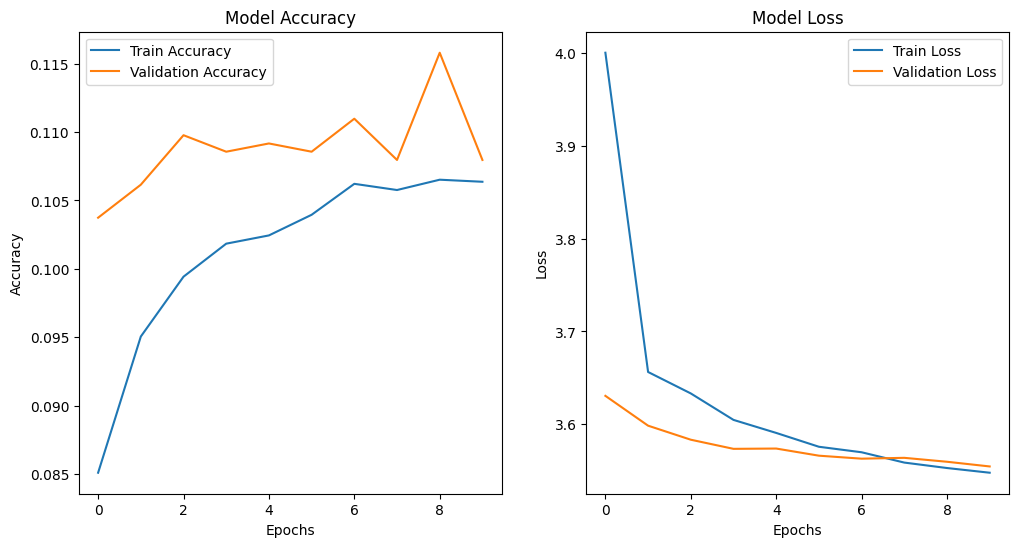


Building Recommendation System...

Recommended Applications:
['THAI DICT 2018', 'Gboard - the Google Keyboard', 'FREEDOME VPN Unlimited anonymous Wifi Security', 'Fu*** Weather (Funny Weather)', 'CM S Pen Add-on(ROOT)', 'FE Connect Fhoton', 'DX Spots Free', 'パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）', 'FreedomPop Diagnostics', 'Keypad Lock Screen']


In [9]:




# Visualization of Deep Learning Model Performance
print("\nVisualizing Deep Learning Model Performance...")

def plot_model_performance(history):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_model_performance(deep_history)

# Recommendation Model
print("\nBuilding Recommendation System...")

def recommend_apps(user_input, age_group, free_only=True):
    recommendations = []

    # 3 random applications from any genre
    random_apps = googleplaystore.sample(3)
    recommendations.extend(random_apps['App'].tolist())

    # Filter based on user input
    filtered_apps = googleplaystore[
        (googleplaystore['Category'] == user_input['Category']) &
        (googleplaystore['Content Rating'] == age_group) &
        (googleplaystore['Type'] == ('Free' if free_only else 'Paid'))
    ]

    # Ensure at least 7 recommendations available
    if len(filtered_apps) < 7:
        filtered_apps = googleplaystore[(googleplaystore['Content Rating'] == age_group)]

    # Select 7 applications based on user preferences
    user_based_apps = filtered_apps.sample(min(7, len(filtered_apps)))
    recommendations.extend(user_based_apps['App'].tolist())

    # Ensure no duplicates
    recommendations = list(set(recommendations))[:10]

    return recommendations

# Example user input
user_input = {
    'Category': 'TOOLS',
}
age_group = 'Everyone'
free_only = True

# Get recommendations
recommended_apps = recommend_apps(user_input, age_group, free_only)
print("\nRecommended Applications:")
print(recommended_apps)
